# <center>CSE3024 Lab 8: CENTRALITY METRICS – SOCIAL NETWORK ANALYSIS </center>
<h3 align="right">Faraz Suhail</h3> 
<h3 align="right">19BCE1525</h3> 

## Ques 1.	Consider the following Facebook friendship network (mutual connection)

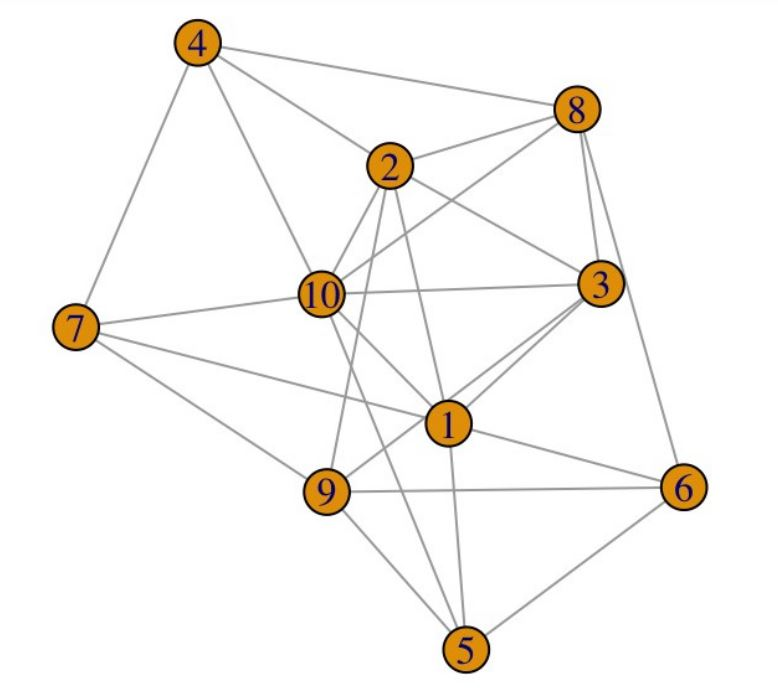

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#create a graph
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,9)
G.add_edge(1,7)
G.add_edge(1,10)
G.add_edge(1,6)
G.add_edge(1,5)
G.add_edge(2,9)
G.add_edge(2,8)
G.add_edge(2,10)
G.add_edge(2,4)
G.add_edge(2,9)
G.add_edge(3,10)
G.add_edge(3,9)
G.add_edge(3,8)
G.add_edge(4,8)
G.add_edge(4,10)
G.add_edge(4,7)
G.add_edge(5,9)
G.add_edge(4,10)
G.add_edge(5,6)
G.add_edge(6,8)
G.add_edge(6,9)
G.add_edge(7,10)
G.add_edge(7,9)
G.add_edge(8,10)
G.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 3, {}), (1, 9, {}), (1, 7, {}), (1, 10, {}), (1, 6, {}), (1, 5, {}), (2, 9, {}), (2, 8, {}), (2, 10, {}), (2, 4, {}), (3, 10, {}), (3, 9, {}), (3, 8, {}), (9, 5, {}), (9, 6, {}), (9, 7, {}), (7, 4, {}), (7, 10, {}), (10, 4, {}), (10, 8, {}), (6, 5, {}), (6, 8, {}), (8, 4, {})])

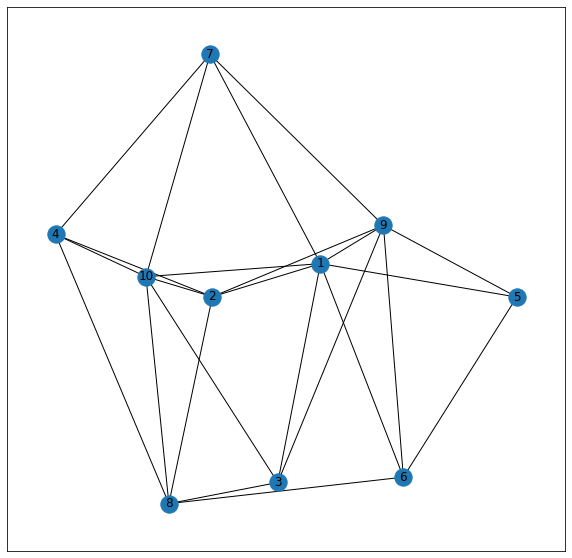

In [3]:
G2 = G.to_undirected()
plt.figure(figsize =(10, 10))
nx.draw_networkx(G2, with_labels = True)

### 1. Find the degree centrality of all nodes

In [4]:
deg_centrality = nx.degree_centrality(G)
print(deg_centrality)

{1: 0.7777777777777777, 2: 0.5555555555555556, 3: 0.4444444444444444, 9: 0.6666666666666666, 7: 0.4444444444444444, 10: 0.6666666666666666, 6: 0.4444444444444444, 5: 0.3333333333333333, 8: 0.5555555555555556, 4: 0.4444444444444444}


In [5]:
d=nx.degree_centrality(G)
mean_arr = []
for i,k in enumerate(d):
 mean_arr.append(d[k])

### 2. Find the neighbors of node 2. 

In [6]:
print(list(G.neighbors(2)))

[1, 9, 8, 10, 4]


### 3. Find the average degree of graph

In [7]:
import statistics
x = statistics.mean(mean_arr)
print("Mean is: ", x)

Mean is:  0.5333333333333333


### 4. Find the density of the graph 

In [8]:
print(nx.density(G))

0.5333333333333333


### 5. Find the closeness centrality of Node 10 

In [9]:
def closeness_centrality(G, u=None, distance=None, normalized=True):
    if distance is not None:
        # use Dijkstra's algorithm with specified attribute as edge weight
        path_length = functools.partial(nx.single_source_dijkstra_path_length, weight=distance)
    else:
        path_length = nx.single_source_shortest_path_length

    if u is None:
        nodes = G.nodes()
    else:
        nodes = [u]
    closeness_centrality = {}
    for n in nodes:
        sp = path_length(G,n)
        totsp = sum(sp.values())
        if totsp > 0.0 and len(G) > 1:
            closeness_centrality[n] = (len(sp)-1.0) / totsp
            # normalize to number of nodes-1 in connected part
            if normalized:
                s = (len(sp)-1.0) / ( len(G) - 1 )
                closeness_centrality[n] *= s
        else:
            closeness_centrality[n] = 0.0
    if u is not None:
        return closeness_centrality[u]
    else:
         return closeness_centrality

In [10]:
print(nx.closeness_centrality(G,10))

0.75


### 6. Find all the paths to reach 4 from 6 

In [11]:
for path in nx.all_simple_paths(G,source = 4, target = 6):
 print(path)

[4, 2, 1, 3, 10, 7, 9, 5, 6]
[4, 2, 1, 3, 10, 7, 9, 6]
[4, 2, 1, 3, 10, 8, 6]
[4, 2, 1, 3, 9, 5, 6]
[4, 2, 1, 3, 9, 6]
[4, 2, 1, 3, 9, 7, 10, 8, 6]
[4, 2, 1, 3, 8, 6]
[4, 2, 1, 3, 8, 10, 7, 9, 5, 6]
[4, 2, 1, 3, 8, 10, 7, 9, 6]
[4, 2, 1, 9, 3, 10, 8, 6]
[4, 2, 1, 9, 3, 8, 6]
[4, 2, 1, 9, 5, 6]
[4, 2, 1, 9, 6]
[4, 2, 1, 9, 7, 10, 3, 8, 6]
[4, 2, 1, 9, 7, 10, 8, 6]
[4, 2, 1, 7, 10, 3, 9, 5, 6]
[4, 2, 1, 7, 10, 3, 9, 6]
[4, 2, 1, 7, 10, 3, 8, 6]
[4, 2, 1, 7, 10, 8, 3, 9, 5, 6]
[4, 2, 1, 7, 10, 8, 3, 9, 6]
[4, 2, 1, 7, 10, 8, 6]
[4, 2, 1, 7, 9, 3, 10, 8, 6]
[4, 2, 1, 7, 9, 3, 8, 6]
[4, 2, 1, 7, 9, 5, 6]
[4, 2, 1, 7, 9, 6]
[4, 2, 1, 10, 3, 9, 5, 6]
[4, 2, 1, 10, 3, 9, 6]
[4, 2, 1, 10, 3, 8, 6]
[4, 2, 1, 10, 7, 9, 3, 8, 6]
[4, 2, 1, 10, 7, 9, 5, 6]
[4, 2, 1, 10, 7, 9, 6]
[4, 2, 1, 10, 8, 3, 9, 5, 6]
[4, 2, 1, 10, 8, 3, 9, 6]
[4, 2, 1, 10, 8, 6]
[4, 2, 1, 6]
[4, 2, 1, 5, 9, 3, 10, 8, 6]
[4, 2, 1, 5, 9, 3, 8, 6]
[4, 2, 1, 5, 9, 6]
[4, 2, 1, 5, 9, 7, 10, 3, 8, 6]
[4, 2, 1, 5, 9, 7, 10, 8, 6]
[4

### 7. Find the longest shortest path between any two nodes

In [12]:
len = list(nx.shortest_path_length(G))
for length in len:
 print(length)

(1, {1: 0, 2: 1, 3: 1, 5: 1, 6: 1, 7: 1, 9: 1, 10: 1, 4: 2, 8: 2})
(2, {2: 0, 1: 1, 4: 1, 8: 1, 9: 1, 10: 1, 3: 2, 5: 2, 6: 2, 7: 2})
(3, {3: 0, 8: 1, 1: 1, 10: 1, 9: 1, 2: 2, 4: 2, 5: 2, 6: 2, 7: 2})
(9, {9: 0, 1: 1, 2: 1, 3: 1, 5: 1, 6: 1, 7: 1, 4: 2, 8: 2, 10: 2})
(7, {7: 0, 1: 1, 10: 1, 4: 1, 9: 1, 2: 2, 3: 2, 5: 2, 6: 2, 8: 2})
(10, {10: 0, 1: 1, 2: 1, 3: 1, 4: 1, 7: 1, 8: 1, 5: 2, 6: 2, 9: 2})
(6, {6: 0, 8: 1, 1: 1, 5: 1, 9: 1, 2: 2, 3: 2, 4: 2, 7: 2, 10: 2})
(5, {5: 0, 1: 1, 9: 1, 6: 1, 2: 2, 3: 2, 7: 2, 8: 2, 10: 2, 4: 3})
(8, {8: 0, 2: 1, 3: 1, 4: 1, 6: 1, 10: 1, 1: 2, 5: 2, 7: 2, 9: 2})
(4, {4: 0, 8: 1, 2: 1, 10: 1, 7: 1, 1: 2, 3: 2, 6: 2, 9: 2, 5: 3})


### 8. Find the shortest path between any two nodes 

In [13]:
short_path = nx.shortest_path(G, 4, 6)
print("Shortest Path: ", short_path)
shortest = nx.shortest_path_length(G, 4, 6)
print("Length: ", shortest)

Shortest Path:  [4, 8, 6]
Length:  2


### 9. Find the Betweenness centrality of Node 1

In [14]:
bet_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False)
print(bet_centrality[1])

0.1597222222222222


### 10. Find the person who has maximum number of connections (friends)

In [15]:
degree_dict = dict(G2.degree(G2.nodes()))
nx.set_node_attributes(G2, degree_dict, 'degree')

sorted_degree = sorted(degree_dict.items(), reverse = True)
print("Top nodes sorted by degree: ")
for d in sorted_degree[:20]:
    print(d)

Top nodes sorted by degree: 
(10, 6)
(9, 6)
(8, 5)
(7, 4)
(6, 4)
(5, 3)
(4, 4)
(3, 4)
(2, 5)
(1, 7)
